In [ ]:
''''ANALYZING RESTAURANT TIPS
There is no evidence to suggest that smokers give more tips than non-smokers. 
But let's try to analyze what our data says.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('data/restuarant_tips.csv')
tips_df=pd.DataFrame(data)

In [8]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


---
### Do smoker people give more tips?

In [12]:
smokers_count=tips_df['smoker'].value_counts()

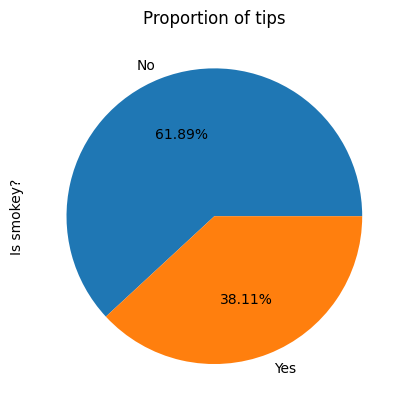

In [13]:
tips_by_smokers_chart = smokers_count.plot(kind ='pie',
                                          label='Is smokey?',
                                          title='Proportion of tips',
                                           autopct='%1.2f%%')

---
### Do men or women give more tips?

In [14]:
sex_count=df['sex'].value_counts()

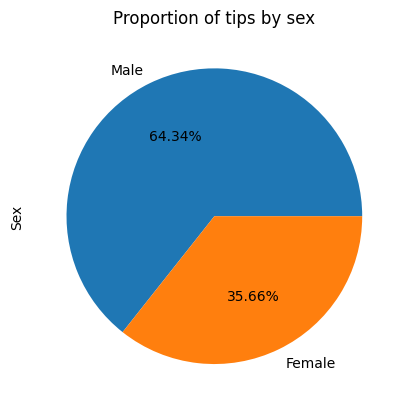

In [15]:
tips_by_sex_count=sex_count.plot(kind='pie',
                                label='Sex',
                                title='Proportion of tips by sex',
                                autopct='%1.2f%%')

---
### Total bill and Tips amounts by sex

In [16]:
tip_amount_by_sex = tips_df.loc[:, ["sex", "total_bill", "tip"]].groupby("sex").mean().reset_index()

Text(0.5, 1.0, 'Tips and total bill amounts by sex')

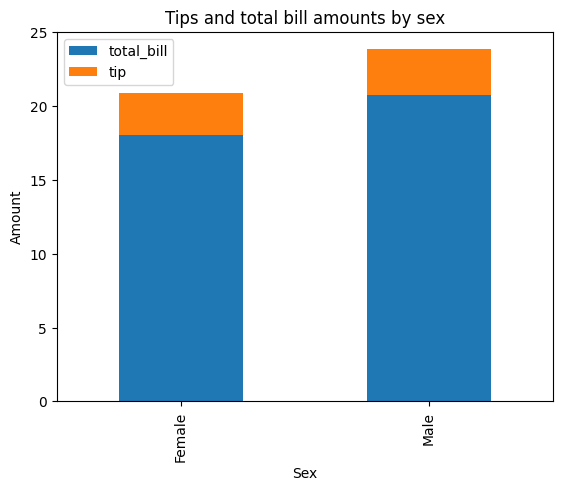

In [17]:
tips_by_sex_chart =tip_amount_by_sex.plot(kind='bar',x='sex',
                                           y=['total_bill','tip'],
                                           stacked=True)
plt.xlabel('Sex')
plt.ylabel('Amount')
plt.title('Tips and total bill amounts by sex')

### Proportion of tips per day of the week

In [18]:
daily_tips = tips_df['day'].value_counts()

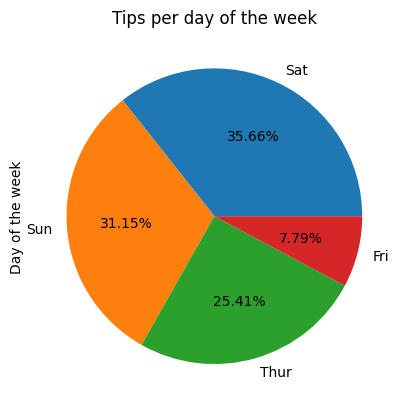

In [19]:
daily_tips_chart = daily_tips.plot(kind="pie",
                                   label="Day of the week",
                                   title="Tips per day of the week",
                                   autopct='%1.2f%%')

### Total bill and Tips per day of the week

In [20]:
from pandas.api.types import CategoricalDtype

day_of_week_order = CategoricalDtype(
    ['Thur', 'Fri', 'Sat', 'Sun'],
    ordered=True
)

tips_df['day'] = tips_df['day'].astype(day_of_week_order)

In [21]:
daily_mean = tips_df.loc[:, ["day", "total_bill", "tip"]].groupby("day").mean().reset_index()

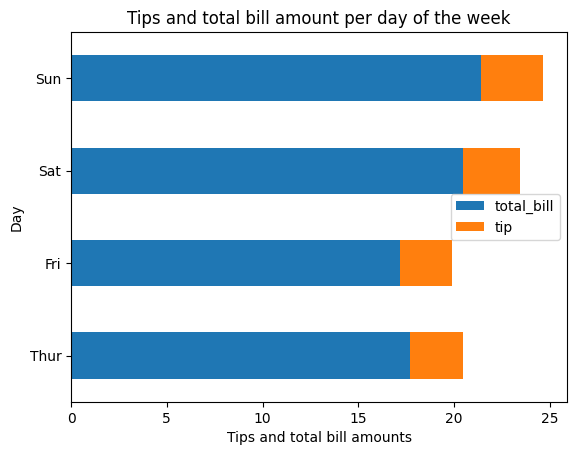

In [26]:
tips_by_day_chart = daily_mean.plot(kind="barh",
                                    x="day",
                                    y=["total_bill", "tip"],
                                    stacked=True,
                                    xlabel="Tips and total bill amounts",
                                    ylabel="Day",
                                    title="Tips and total bill amount per day of the week")

### Are there better tips during the day or at night?

In [27]:
dinner_lunch_df = tips_df.loc[:, ["time", "total_bill", "tip"]].groupby('time').mean(numeric_only=True).reset_index()


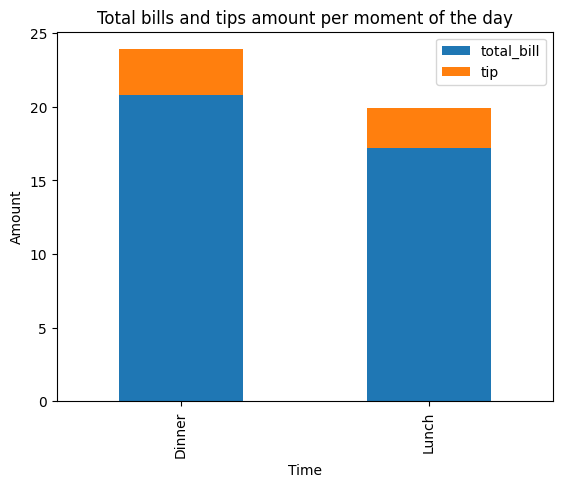

In [28]:
dinner_lunch_chart =dinner_lunch_df.plot(kind='bar',
                                         x='time',
                                         y=['total_bill','tip'],
                                         title='Total bills and tips amount per moment of the day',
                                         stacked=True,
                                         xlabel='Time',
                                         ylabel='Amount'
                                        )